<h3>Import of price data of the last 2 years from January 15, 2021, for 10 shares out of Dax 30</h3>

<p>The shares of the following 10 DAX 30 companies are considered: Allianz, BASF, Bayer, Beiersdorf, BMW, Continental, Siemens, Merck, Daimler, VW</p>

In [50]:
import numpy as np
import csv
import os

current_path = os.getcwd()
with open(current_path + '/Stock prices dax 30_new.csv') as stockprices:
    data = list(csv.reader(stockprices, delimiter=","))

In [51]:
data_array = np.array(data)
data_only = data_array[1:data_array.shape[0],1:11].T
data_only = np.array([[float(y) for y in x] for x in data_only])
data_array

array([['', 'Allianz', 'BASF', ..., 'Merck', 'Daimler', 'VW'],
       ['2021-01-15', '202.15', '67.29', ..., '148.9', '56.26', '151.88'],
       ['2021-01-14', '203.2', '68.1', ..., '149.7', '57.81', '151.98'],
       ...,
       ['2019-01-17', '180.24', '63', ..., '90', '48.935', '142.9'],
       ['2019-01-16', '180.4', '62.87', ..., '90.6', '49.85', '144.9'],
       ['2019-01-15', '179.24', '63', ..., '91.6', '49.44', '145.06']],
      dtype='<U11')

<h3>Calculation of the (empirical) correlation matrices based on the given price data</h3>

<p>Correlation matrices of the choosen 10 stocks from DAX 30 based on the price data of the last t (e.g. 35) days. Starting with January 15, 2021, the correlation matrices were determined retrospectively with an offset of one day. In the end we obtain 472 matrices for further numerical tests by this approach.</p>

In [52]:
t = 35 #length of retrospective observation period

Sigma = np.zeros((10,10,data_only.shape[1]-t+1))
Corr = np.zeros((10,10,data_only.shape[1]-t+1))

for l in range(0,data_only.shape[1]-t):
    
    Var = np.zeros(10)

    for k in range(l,l+t-1):

        Sigma[:,:,l] = Sigma[:,:,l] + np.dot(np.subtract(data_only[:,k], np.mean(data_only[:,l:l+t-1], axis = 1)).reshape((10,1)), np.subtract(data_only[:,k], np.mean(data_only[:,l:l+t-1], axis = 1)).reshape((1,10)))
        Var = Var + np.subtract(data_only[:,k], np.mean(data_only[:,l:l+t-1], axis = 1))**2
        
        #Sigma[:,:,l] = (1/t-1) * Sigma[:,:,l] aktivate for covariance matrix
        
    Corr[:,:,l] = Sigma[:,:,l] / np.sqrt(np.dot(Var.reshape((10,1)), Var.reshape((1,10))))
    
Corr[:,:,1]


array([[ 1.        ,  0.56072405,  0.79447834,  0.47271317, -0.21993735,
         0.63775758,  0.74467635,  0.56492142,  0.42211169,  0.34676617],
       [ 0.56072405,  1.        ,  0.68502566,  0.15135751, -0.76665334,
         0.30173041,  0.93544585,  0.83684324,  0.22669001,  0.0952635 ],
       [ 0.79447834,  0.68502566,  1.        ,  0.42899415, -0.51057606,
         0.45327586,  0.80913672,  0.72896788,  0.16680439,  0.1693026 ],
       [ 0.47271317,  0.15135751,  0.42899415,  1.        ,  0.08167351,
         0.52922792,  0.26445634,  0.09041253,  0.21796698,  0.45491521],
       [-0.21993735, -0.76665334, -0.51057606,  0.08167351,  1.        ,
         0.05205804, -0.70004285, -0.76714456,  0.32743022,  0.43314313],
       [ 0.63775758,  0.30173041,  0.45327586,  0.52922792,  0.05205804,
         1.        ,  0.45336892,  0.34549764,  0.60056376,  0.66427458],
       [ 0.74467635,  0.93544585,  0.80913672,  0.26445634, -0.70004285,
         0.45336892,  1.        ,  0.87464039

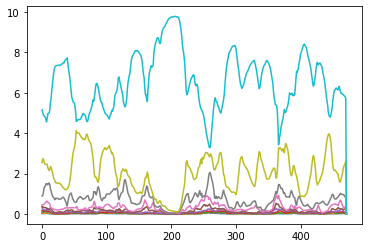

In [53]:
import numpy as np
from matplotlib import pyplot as plt

number = 472
values = np.zeros([number,10])
for k in range(number):
    values[k,:] = np.sort(np.linalg.eigvals(Corr[:,:,k]))
    
for k in range(10):
    plt.plot(values[:,k])